<a href="https://colab.research.google.com/github/surjabej/Health_insurance_cost/blob/main/Health_insurance_costfinal_29_08_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Data collection

In [ ]:

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Health_insurance_cost.csv")
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
data.shape #  checking shape of the dataframe there are 7 column and 1338 rows

(1338, 7)

# Exploratory data analysis Data Cleaning and Data Preprocessing


In [ ]:
data.isnull().sum()   #  checking Null value or missing value of the dataframe

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
data['age']

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

In [ ]:
data['age'].mean()

39.16641221374046

In [ ]:
data['age'].median()

39.0

In [ ]:
data['age'].fillna(data['age'].median(),inplace = True) # fill null value with median value of age

In [ ]:
data.isnull().sum()

age                        0
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
data['BMI'].mean()

30.638216730038025



Looks like normal or gaussian distribution with mean 30 i.e, average BMI is around 30 (overweight t obese)

BMI < 18.5 : underweight
BMI 18.5-24.9 : normal weight
BMI 25-29.9 : overweight
BMI 30-39.9 : obesity
BMI > 40 : morbid obesity


In [ ]:
data['BMI'].median()

30.305

In [ ]:
data['BMI'].fillna(data['BMI'].median(),inplace = True) # fill null value with median value of BMI

In [ ]:
data.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    2
dtype: int64

In [ ]:
data['health_insurance_price'].mean()

13268.527719467815

In [ ]:
data['health_insurance_price'].median()

9382.033

In [ ]:
data['health_insurance_price'].fillna(data['health_insurance_price'].median(),inplace = True) # fill null value with median value of Healthprice

In [ ]:
data.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [ ]:
data['location'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64

In [ ]:
# normal range of BMI is 18.5 to 24.9

<Axes: ylabel='BMI'>

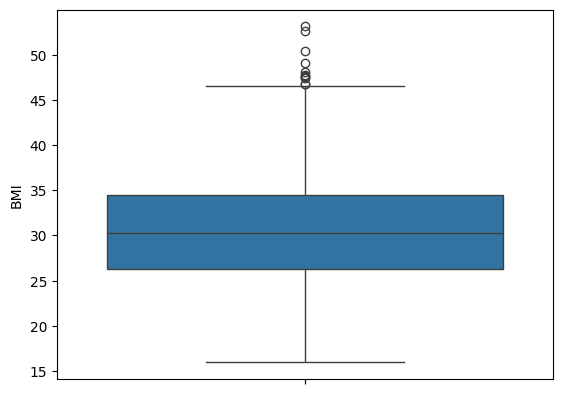

In [ ]:
sns.boxplot(data['BMI'])

In [ ]:
data.describe()

,age,BMI,Children,health_insurance_price
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.162930,30.632489,1.094918,13262.718310
std,13.907443,6.057672,1.205493,12104.666613
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.521225
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
Q3=34.43
Q1=26.315
IQR=Q3-Q1
print(IQR)

8.114999999999998


In [ ]:
UC=Q3+1.5*IQR
UC

46.6025

In [ ]:
data["BMI"] = np.where(data["BMI"]>UC,UC,data["BMI"])


# Data Visualisation

<Axes: ylabel='BMI'>

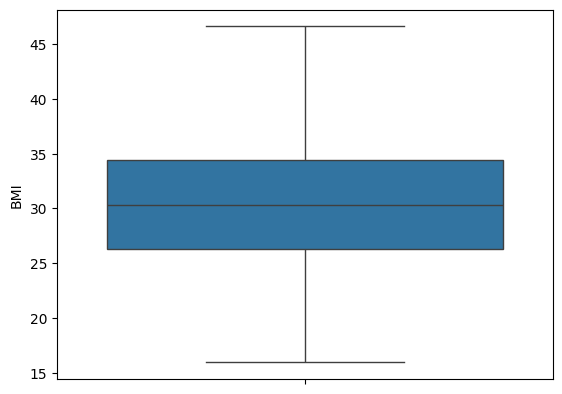

In [ ]:
sns.boxplot(data['BMI'])

Correlation
Strength

0       : No Correlation<br>
1 or -1 : Perfect Linear Relation



In [ ]:
data.corr()

<ipython-input-117-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,BMI,Children,health_insurance_price
age,1.000000,0.110503,0.041057,0.294387
BMI,0.110503,1.000000,0.010755,0.194800
Children,0.041057,0.010755,1.000000,0.067302
health_insurance_price,0.294387,0.194800,0.067302,1.000000


<ipython-input-118-9e627fd25faf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  v = sns.heatmap(data.corr(), annot=True)


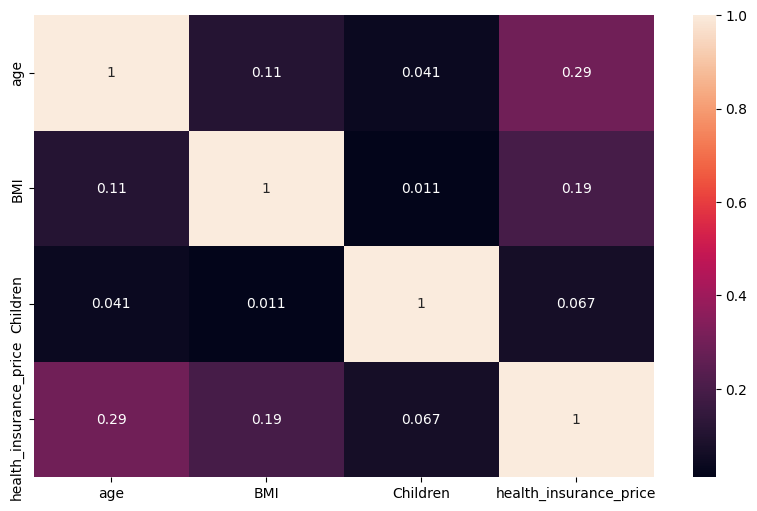

In [ ]:
# can we change the size of plot
plt.figure(figsize=(10,6))
v = sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
data

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [ ]:
data['smoking_status'].value_counts()

no     1064
yes     274
Name: smoking_status, dtype: int64

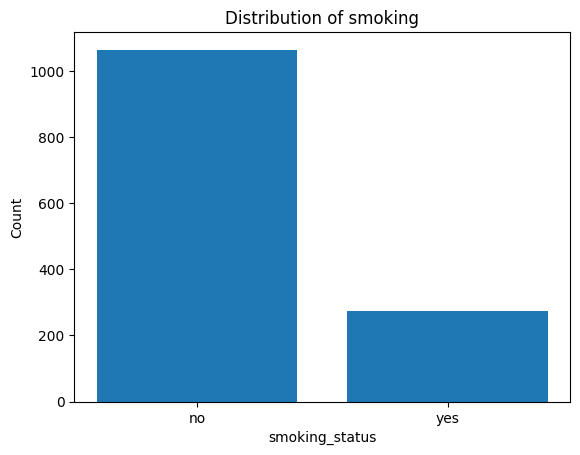

In [ ]:
#creat barpolt using Matplotlib
smoking_count=data['smoking_status'].value_counts()
plt.bar(smoking_count.index,smoking_count.values)
plt.xlabel('smoking_status')
plt.ylabel('Count')
plt.title('Distribution of smoking')
plt.show()

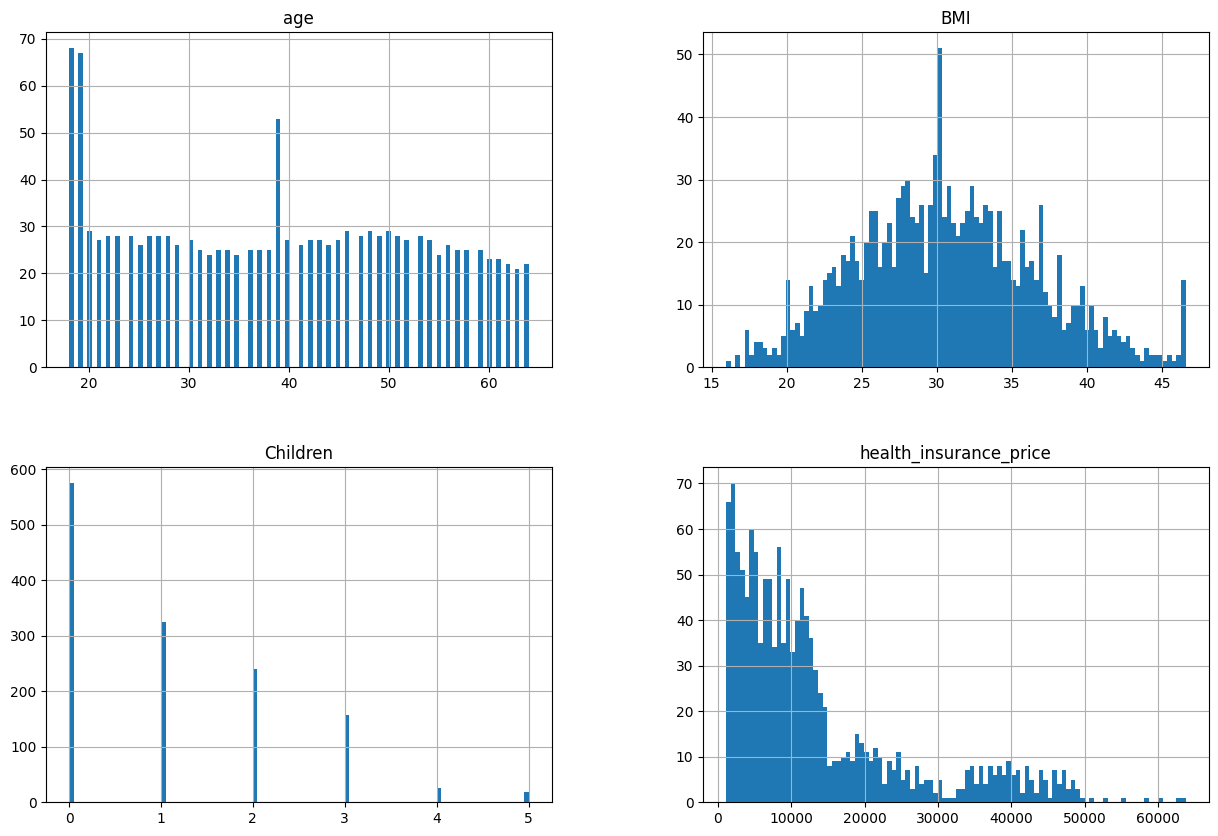

In [ ]:
#Histogram is used to see the distribution of a numerical value
data.hist(bins=100,figsize=(15,10))
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(data,
                 x='age',
                 y='health_insurance_price',
                 color='smoking_status',
                 opacity=0.9,
                 hover_data=['gender'],
                 title='Age vs. health_insurance_price')
fig.update_traces(marker_size=5)
fig.show()

# Feature Engineering

In [ ]:
# we can convert categorical into numerical - (dummies/label_encoder)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data["gender_new"] = le.fit_transform(data["gender"])

In [ ]:
data["smoking_status_new"] = le.fit_transform(data["smoking_status"])

In [ ]:
data["location_new"] = le.fit_transform(data["location"])

In [ ]:
data

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,gender_new,smoking_status_new,location_new
0,19.0,female,30.305,0,yes,southwest,16884.92400,0,1,3
1,18.0,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28.0,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33.0,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32.0,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18.0,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18.0,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21.0,female,25.800,0,no,southwest,2007.94500,0,0,3


<Axes: ylabel='health_insurance_price'>

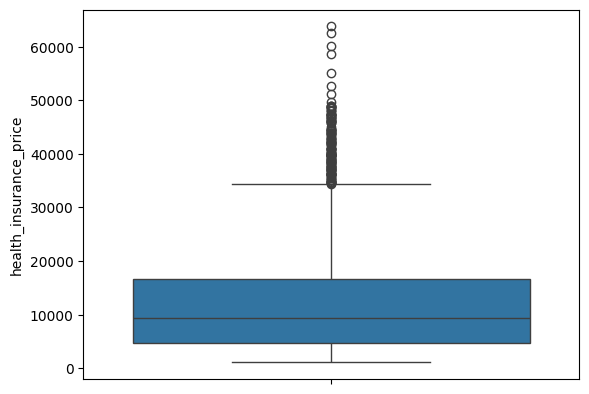

In [ ]:
sns.boxplot(data["health_insurance_price"])

<ipython-input-16-542cb625aa37>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




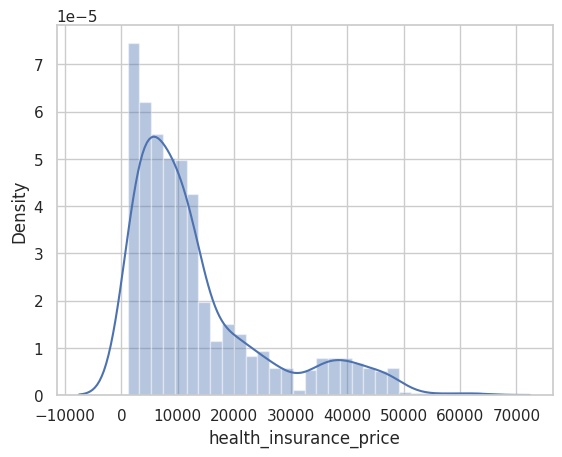

In [ ]:
sns.distplot(data['health_insurance_price']) # Annual_income value is skwed in right side
plt.show()

<ipython-input-15-628260649f07>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribution of Charges')

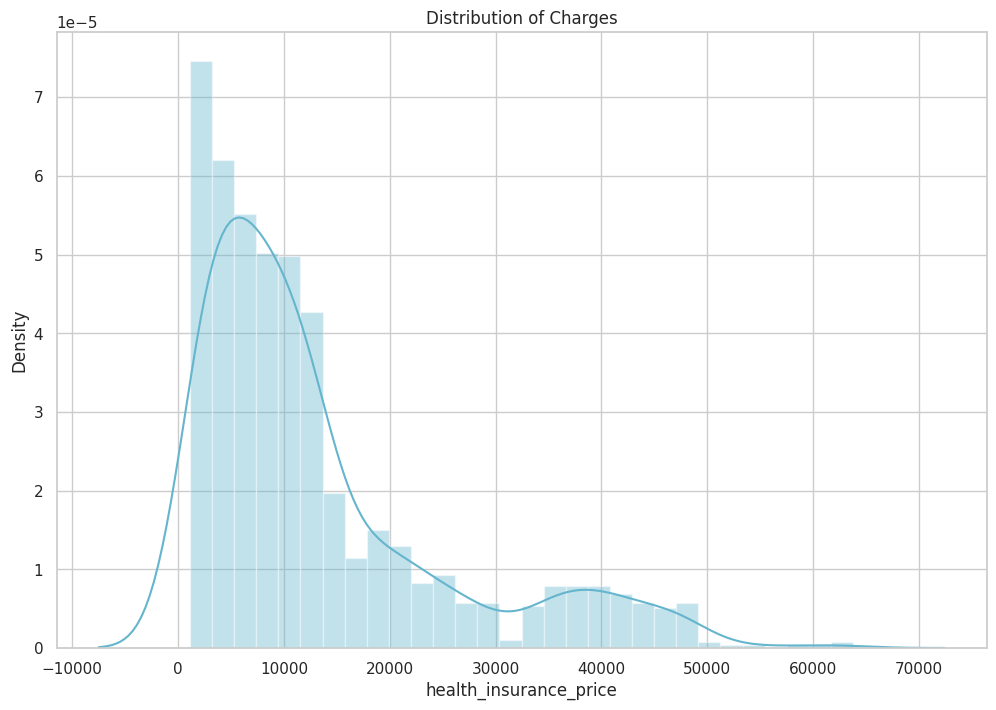

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['health_insurance_price'], kde = True, color = 'c')
plt.title('Distribution of Charges')

In [ ]:
data["health_insurance_price"].describe()

count     1336.000000
mean     13268.527719
std      12112.797724
min       1121.873900
25%       4744.325050
50%       9382.033000
75%      16604.302645
max      63770.428010
Name: health_insurance_price, dtype: float64

In [ ]:
q3=16584.318157
q1=4746.521225
IQR=q3-q1
print(IQR)

11837.796932000001


In [ ]:
uc=q3+1.5*IQR
uc

34341.013555000005

In [ ]:
data["health_insurance_price"] = np.where(data["health_insurance_price"]>uc,uc,data["health_insurance_price"])

<Axes: ylabel='health_insurance_price'>

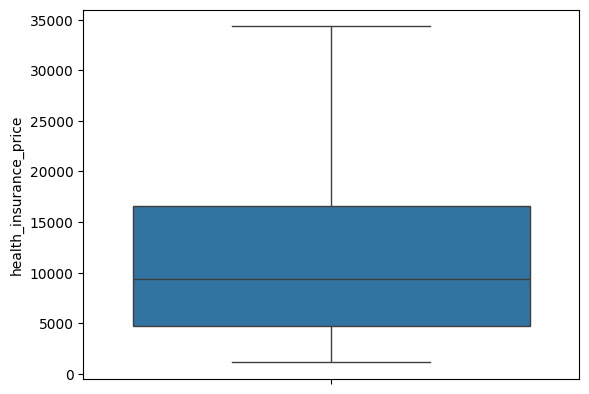

In [ ]:
sns.boxplot(data["health_insurance_price"])

<ipython-input-171-542cb625aa37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['health_insurance_price']) # Annual_income value is skwed in right side


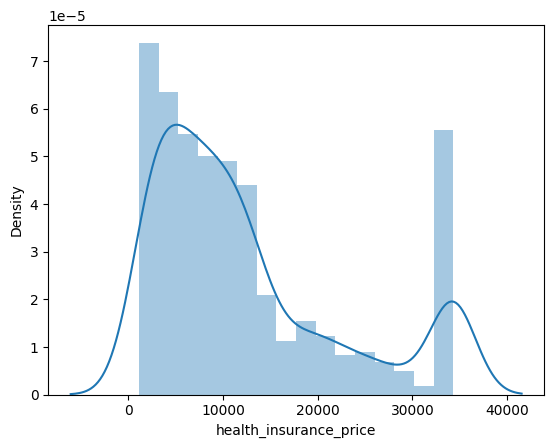

In [ ]:
sns.distplot(data['health_insurance_price']) # Annual_income value is skwed in right side
plt.show()

In [ ]:
Y = data["health_insurance_price"]
X = data.drop(["health_insurance_price","gender","smoking_status","location"],axis=1)

In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1338, dtype: float64

In [ ]:
X

,age,BMI,Children,gender_new,smoking_status_new,location_new
0,19.0,30.305,0,0,1,3
1,18.0,33.770,1,1,0,2
2,28.0,33.000,3,1,0,2
3,33.0,22.705,0,1,0,1
4,32.0,28.880,0,1,0,1
...,...,...,...,...,...,...
1333,50.0,30.970,3,1,0,1
1334,18.0,31.920,0,0,0,0
1335,18.0,36.850,0,0,0,2
1336,21.0,25.800,0,0,0,3


# Feature Scaling

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(X)

In [ ]:
x

array([[-1.45033627, -0.0515465 , -0.90861367, -1.0105187 ,  1.97058663,
         1.34390459],
       [-1.5222671 ,  0.52588071, -0.07876719,  0.98959079, -0.5074631 ,
         0.43849455],
       [-0.8029588 ,  0.39756355,  1.58092576,  0.98959079, -0.5074631 ,
         0.43849455],
       ...,
       [-1.5222671 ,  1.03914935, -0.90861367, -1.0105187 , -0.5074631 ,
         0.43849455],
       [-1.30647461, -0.80228521, -0.90861367, -1.0105187 , -0.5074631 ,
         1.34390459],
       [ 1.57075859, -0.2573539 , -0.90861367, -1.0105187 ,  1.97058663,
        -0.46691549]])

# Model Building

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,Y, test_size=.20,random_state=42)
print("Train_size",X_train.shape)
print("Test_size",X_test.shape)

Train_size (1070, 6)
Test_size (268, 6)


# Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable.

# 1. LinerRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [3099.27713942 1349.15585387  457.23159351  -51.63086843 7929.01230557
 -284.19709173]


In [ ]:
# prediction train
pred_train = lm.predict(X_train)
pred_train

array([ 8130.56695145,  8834.4627184 ,  9555.9095259 , ...,
       11375.69515629, 31250.32922239, 10997.27605824])

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
num_folds = 5
# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds)
# 100 we created 5 split in data - each split - 20%

In [ ]:
# Perform cross-validation
scores = cross_val_score(lm,x,Y, cv=kf)

print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.75389212 0.67474587 0.78019901 0.72396307 0.74510815]
Average Score: 0.7355816448605415


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(Y_train,pred_train))

0.7282751565283097


In [ ]:
# prediction
pred_test = lm.predict(X_test)


In [ ]:

print(r2_score(Y_test,pred_test))

0.7783385471363439


In [ ]:
mse = mean_squared_error(Y_test,pred_test)
mse

23864593.513843533

In [ ]:
res = pd.DataFrame({"Actual_price":Y_test, "prediction":pred_test})
res

,Actual_price,prediction
764,9095.068250,9339.690097
887,5272.175800,7406.415002
890,29330.983150,32592.196889
1293,9301.893550,9709.627063
259,33750.291800,28047.614009
...,...,...
109,34341.013555,33853.419135
575,12222.898300,11670.185432
535,6067.126750,7937.223907
543,34341.013555,34538.650881


# 2. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [ ]:
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
pred_test1 = RF.predict(X_test)


In [ ]:
print(r2_score(Y_test,pred_test1))

0.8196239935757803


In [ ]:
res = pd.DataFrame({"Actual_price":Y_test, "prediction":pred_test1})
res

,Actual_price,prediction
764,9095.068250,12006.547100
887,5272.175800,5250.523267
890,29330.983150,27954.368016
1293,9301.893550,10365.456824
259,33750.291800,34333.182881
...,...,...
109,34341.013555,34341.013555
575,12222.898300,12810.999577
535,6067.126750,6233.448579
543,34341.013555,34341.013555


In [ ]:
# Perform cross-validation
scores = cross_val_score(RF,x,Y, cv=5)

print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.7768396  0.69180157 0.80509375 0.78087012 0.80469638]
Average Score: 0.7718602841488817
